In [2]:
# Import Packages
import numpy as np
from torch.autograd import Variable
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

# Import local model files
from FBRN.myfunc import Physics
from FBRN.myfunc import MyMatmul
from FBRN.main import FBRestNet
from FBRN.model import MyModel
from FBRN.myfunc import Export_hyper

from FBRN.proxop.hypercube import cardan
from FBRN.proxop.hyperslab import cardan_slab

In [9]:
# Model parameters
params = {
    'N' : 2000,
    'k' : 50,
    'a' : 0.5,
    'r' : 1

}

In [10]:
m=params['k']
nx=params['N']
a=params['a']

eigm = (np.linspace(0,m-1,m)+1/2)*np.pi
eig_m      = eigm.reshape(-1,1)
# Fix the base definition
#v1         = ((2*np.linspace(0,self.nx-1,self.nx)+1)*h/2).reshape(1,-1)
v1         = ((2*np.linspace(0,nx-1,nx)+1)/(2*nx)).reshape(1,-1)
#v2         = (np.ones(self.nx)/2*h).reshape(1,-1)
v2         = (np.ones(nx)/(2*nx)).reshape(1,-1)

#### OBSERVATION

The base differs from the theory on the paper!!!

In [14]:
base       = 2*np.sqrt(2)/eig_m*np.cos(v1*eig_m)*np.sin(v2*eig_m)
#base       = 2*np.sqrt(2)*np.tile(eig_m**(-a),(1,nx))*np.cos(v1*(eig_m**(a)))*np.sin(v2*eig_m**(a))

### Is the base orthogonal?

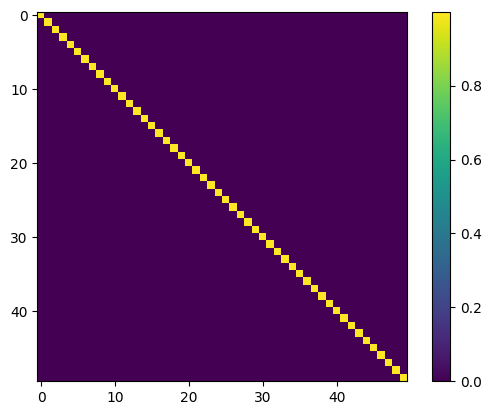

In [15]:
cross_prod =  np.zeros((params['k'],params['k']))

for i in range(params['k']):
    for j in range(params['k']):
        cross_prod[i,j] = base[i].T@base[j]*params['N']

plt.imshow(cross_prod)
plt.colorbar()
plt.show()

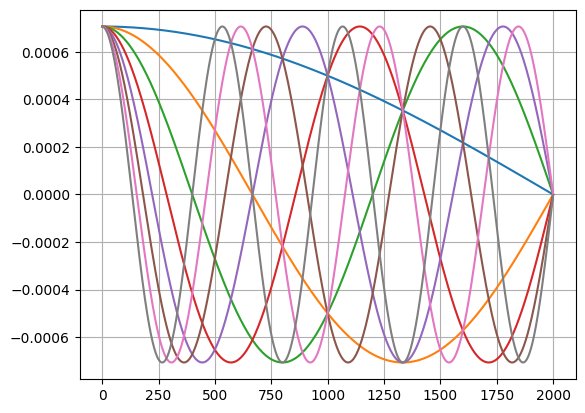

In [16]:
for i in range(8): 
    plt.plot(base[i])
plt.grid(True,'both')